In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

In [2]:
from brewaed import utils, labels, beerbubble, dataset
import brewaed


In [3]:

import os
import math

import numpy
import pandas

import librosa
import soundfile

from matplotlib import pyplot as plt
import librosa.display

In [4]:
files = dataset.load_files()
files

brews                            path
id                                                
MN0Mg1uyznU      3  ../data/audio/MN0Mg1uyznU.opus
by0e-EkAsOE      1  ../data/audio/by0e-EkAsOE.opus
q2srYoC3FOo      1  ../data/audio/q2srYoC3FOo.opus
p0jtxp5nWms      1  ../data/audio/p0jtxp5nWms.opus
f3bLQLT48Yc      1  ../data/audio/f3bLQLT48Yc.opus
WHlSNkq29k4      1  ../data/audio/WHlSNkq29k4.opus
51ytpDZj8v4      1  ../data/audio/51ytpDZj8v4.opus
gQFo3Lg2MAc      1  ../data/audio/gQFo3Lg2MAc.opus
po2u_qI7-us      1  ../data/audio/po2u_qI7-us.opus
ZPmEByu-4xQ      1  ../data/audio/ZPmEByu-4xQ.opus
vrM-lZ5H54Y      1  ../data/audio/vrM-lZ5H54Y.opus
PvBE0mZmBHY      1  ../data/audio/PvBE0mZmBHY.opus
dE9FjwMeWLs      1  ../data/audio/dE9FjwMeWLs.opus
0DXxOutOilU      1  ../data/audio/0DXxOutOilU.opus
bp6CT68rqoY      1  ../data/audio/bp6CT68rqoY.opus
Lqw3VX3FcwI      1  ../data/audio/Lqw3VX3FcwI.opus
pUkmG2sPBD4      1  ../data/audio/pUkmG2sPBD4.opus
Y-2R3cRRzTI      1  ../data/audio/Y-2R3cRRzTI.opus
G5mAKVP-KX8      1  ../data/audio/G5mAKVP-KX8.opus
570zQJRhllI      1  ../data/audio/570zQJRhllI.opus
eu6nphXTbTM      1  ../data/audio/eu6nphXTbTM.opus
kbxwuXZqTs0      1  ../data/audio/kbxwuXZqTs0.opus
SxwBGPdNSzQ      1  ../data/audio/SxwBGPdNSzQ.opus
U8IifcAWvo4      1  ../data/audio/U8IifcAWvo4.opus
e5hFI1Z2gGI      1  ../data/audio/e5hFI1Z2gGI.opus
UaUlVaap3dY      1  ../data/audio/UaUlVaap3dY.opus
x7Tmty772FQ      1  ../data/audio/x7Tmty772FQ.opus
xdXpCw9qdDo      1  ../data/audio/xdXpCw9qdDo.opus
_vi1q6QfkG4      1  ../data/audio/_vi1q6QfkG4.opus
WznxXBRUVb0      1  ../data/audio/WznxXBRUVb0.opus
aVUnxUfeBMA      1  ../data/audio/aVUnxUfeBMA.opus
8iuJLfs4uP8      1  ../data/audio/8iuJLfs4uP8.opus
6VQTGuOY4Uk      1  ../data/audio/6VQTGuOY4Uk.opus
1KIecmSnD5g      1  ../data/audio/1KIecmSnD5g.opus
AWSX4uQopXA      1  ../data/audio/AWSX4uQopXA.opus
DV_9tfFyY00      1  ../data/audio/DV_9tfFyY00.opus
mRpjUjNK0z0      1  ../data/audio/mRpjUjNK0z0.opus
xS35DfrhRG0      1  ../data/audio/xS35DfrhRG0.opus
CXn5vgiV914      1  ../data/audio/CXn5vgiV914.opus
LiofYnl4UeI      1  ../data/audio/LiofYnl4UeI.opus
mFaxJJUHtB8      1  ../data/audio/mFaxJJUHtB8.opus
t0pOz-gviZs      1  ../data/audio/t0pOz-gviZs.opus
Qvyf8h8dr4I      1  ../data/audio/Qvyf8h8dr4I.opus

In [5]:

def load_file(path, sr=16000):
    y, sr = librosa.load(path, offset=0, duration=5*60, sr=sr)
    
    return y
    
audio = load_file(files.iloc[0].path)

In [6]:

def plot_time_spans(ax, spans, **kwargs):
    
    # TODO: support adding text
    for idx, span in spans.iterrows():
        s = span.start
        e = span.end
        #print(s, e)
        ax.axvspan(xmin=s, xmax=e, **kwargs)

    return None

def find_events(data, n_mixtures = 2, random_state = 1, n_states = 2):

    import hmmlearn.hmm
    
    import sklearn.pipeline
    from sklearn.preprocessing import StandardScaler

    model = hmmlearn.hmm.GMMHMM(n_components=n_states, n_mix=n_mixtures,
                            covariance_type="diag", random_state=random_state,
    )

    X = StandardScaler().fit_transform(data)
    model.fit(X)
    prob = model.score_samples(X)[1][:,1]
    
    out = pandas.DataFrame({
        'prob': prob,
    })
    return out


0DXxOutOilU
last 0 31.776
21.152    1
21.216    0
21.408    1
28.000    0
28.224    1
31.552    0
31.776    0
dtype: int64
Event distances: 3.5359999999999996 1.3118270601198394
Events expected 8
Events gotten 3 37.5 %
Wrote labels.0DXxOutOilU.txt
bp6CT68rqoY
last 0 21.088
0.960     1
1.184     0
1.280     1
3.328     0
6.208     1
8.416     0
8.448     1
8.640     0
12.032    1
12.256    0
12.352    1
12.864    0
13.152    1
13.280    0
13.344    1
14.464    0
14.528    1
14.720    0
14.816    1
14.880    0
18.336    1
18.688    0
18.720    1
19.904    0
21.088    0
dtype: int64
Event distances: 1.6145454545454543 1.0433723799394528
Events expected 26
Events gotten 12 46.15384615384615 %
Wrote labels.bp6CT68rqoY.txt
Lqw3VX3FcwI


Degenerate mixture covariance


last 1 27.232
0.768     1
27.232    1
dtype: int64
Event distances: 26.464 nan
Events expected 1
Events gotten 2 200.0 %
Wrote labels.Lqw3VX3FcwI.txt
pUkmG2sPBD4


Degenerate mixture covariance


last 1 28.416
0.000     1
0.160     0
4.512     1
4.672     0
7.200     1
7.360     0
11.360    1
11.520    0
11.648    1
11.744    0
14.272    1
14.400    0
16.736    1
17.632    0
17.696    1
17.760    0
18.336    1
18.368    0
18.592    1
19.744    0
19.872    1
19.904    0
20.224    1
20.544    0
20.640    1
20.672    0
20.704    1
20.768    0
20.960    1
20.992    0
23.136    1
23.296    0
25.184    1
25.248    0
28.032    1
28.416    1
dtype: int64
Event distances: 1.5786666666666667 0.8913226250913538
Events expected 25
Events gotten 19 76.0 %
Wrote labels.pUkmG2sPBD4.txt
Y-2R3cRRzTI


Degenerate mixture covariance


last 0 23.264
0.224     1
0.288     0
0.416     1
0.480     0
0.576     1
         ..
22.944    1
23.040    0
23.104    1
23.168    0
23.264    0
Length: 265, dtype: int64
Event distances: 0.17465648854961832 0.5011210475216119
Events expected 145
Events gotten 132 91.0344827586207 %
Wrote labels.Y-2R3cRRzTI.txt
G5mAKVP-KX8
last 0 31.136
0.576     1
0.672     0
0.704     1
0.768     0
0.928     1
         ..
27.744    1
27.808    0
30.432    1
30.912    0
31.136    0
Length: 97, dtype: int64
Event distances: 0.6352340425531915 0.7825245208214893
Events expected 57
Events gotten 48 84.21052631578947 %
Wrote labels.G5mAKVP-KX8.txt
570zQJRhllI


Degenerate mixture covariance


last 1 31.264
0.128     1
0.224     0
2.784     1
3.584     0
4.800     1
5.440     0
6.784     1
6.816     0
7.168     1
7.488     0
7.552     1
7.936     0
10.560    1
10.944    0
11.712    1
12.416    0
13.696    1
14.144    0
15.296    1
15.904    0
17.472    1
17.952    0
20.064    1
21.152    0
21.216    1
21.824    0
21.984    1
22.176    0
22.784    1
23.488    0
25.728    1
26.432    0
26.528    1
26.848    0
27.520    1
27.552    0
31.136    1
31.264    1
dtype: int64
Event distances: 1.638736842105263 0.6201611027550934
Events expected 19
Events gotten 20 105.26315789473684 %
Wrote labels.570zQJRhllI.txt
eu6nphXTbTM
last 1 21.376
0.000     1
0.128     0
0.512     1
0.704     0
1.056     1
         ..
20.448    0
20.832    1
21.024    0
21.280    1
21.376    1
Length: 92, dtype: int64
Event distances: 0.46469565217391307 0.3867581598050646
Events expected 41
Events gotten 47 114.6341463414634 %
Wrote labels.eu6nphXTbTM.txt
kbxwuXZqTs0


Degenerate mixture covariance


last 1 17.408
1.184     1
17.408    1
dtype: int64
Event distances: 16.224 nan
Events expected 1
Events gotten 2 200.0 %
Wrote labels.kbxwuXZqTs0.txt
SxwBGPdNSzQ
last 0 20.448
0.480     1
0.512     0
1.024     1
1.088     0
1.216     1
         ..
20.160    1
20.256    0
20.320    1
20.416    0
20.448    0
Length: 247, dtype: int64
Event distances: 0.16262295081967212 0.44296515300765565
Events expected 127
Events gotten 123 96.8503937007874 %
Wrote labels.SxwBGPdNSzQ.txt
U8IifcAWvo4
last 0 14.848
1.568     1
1.856     0
5.248     1
5.920     0
6.752     1
7.040     0
7.392     1
7.680     0
9.312     1
9.600     0
9.856     1
10.144    0
11.296    1
11.552    0
13.792    1
14.080    0
14.336    1
14.592    0
14.848    0
dtype: int64
Event distances: 1.596 0.6871113044300093
Events expected 10
Events gotten 9 90.0 %
Wrote labels.U8IifcAWvo4.txt
e5hFI1Z2gGI
last 0 13.472
0.000     1
0.416     0
0.480     1
1.504     0
1.600     1
2.624     0
2.688     1
3.744     0
3.808     1
4.864    

Degenerate mixture covariance


last 0 16.384
0.128     1
12.448    0
16.384    0
dtype: int64


/home/jon/projects/emlearn/venv/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


ValueError: cannot convert float NaN to integer

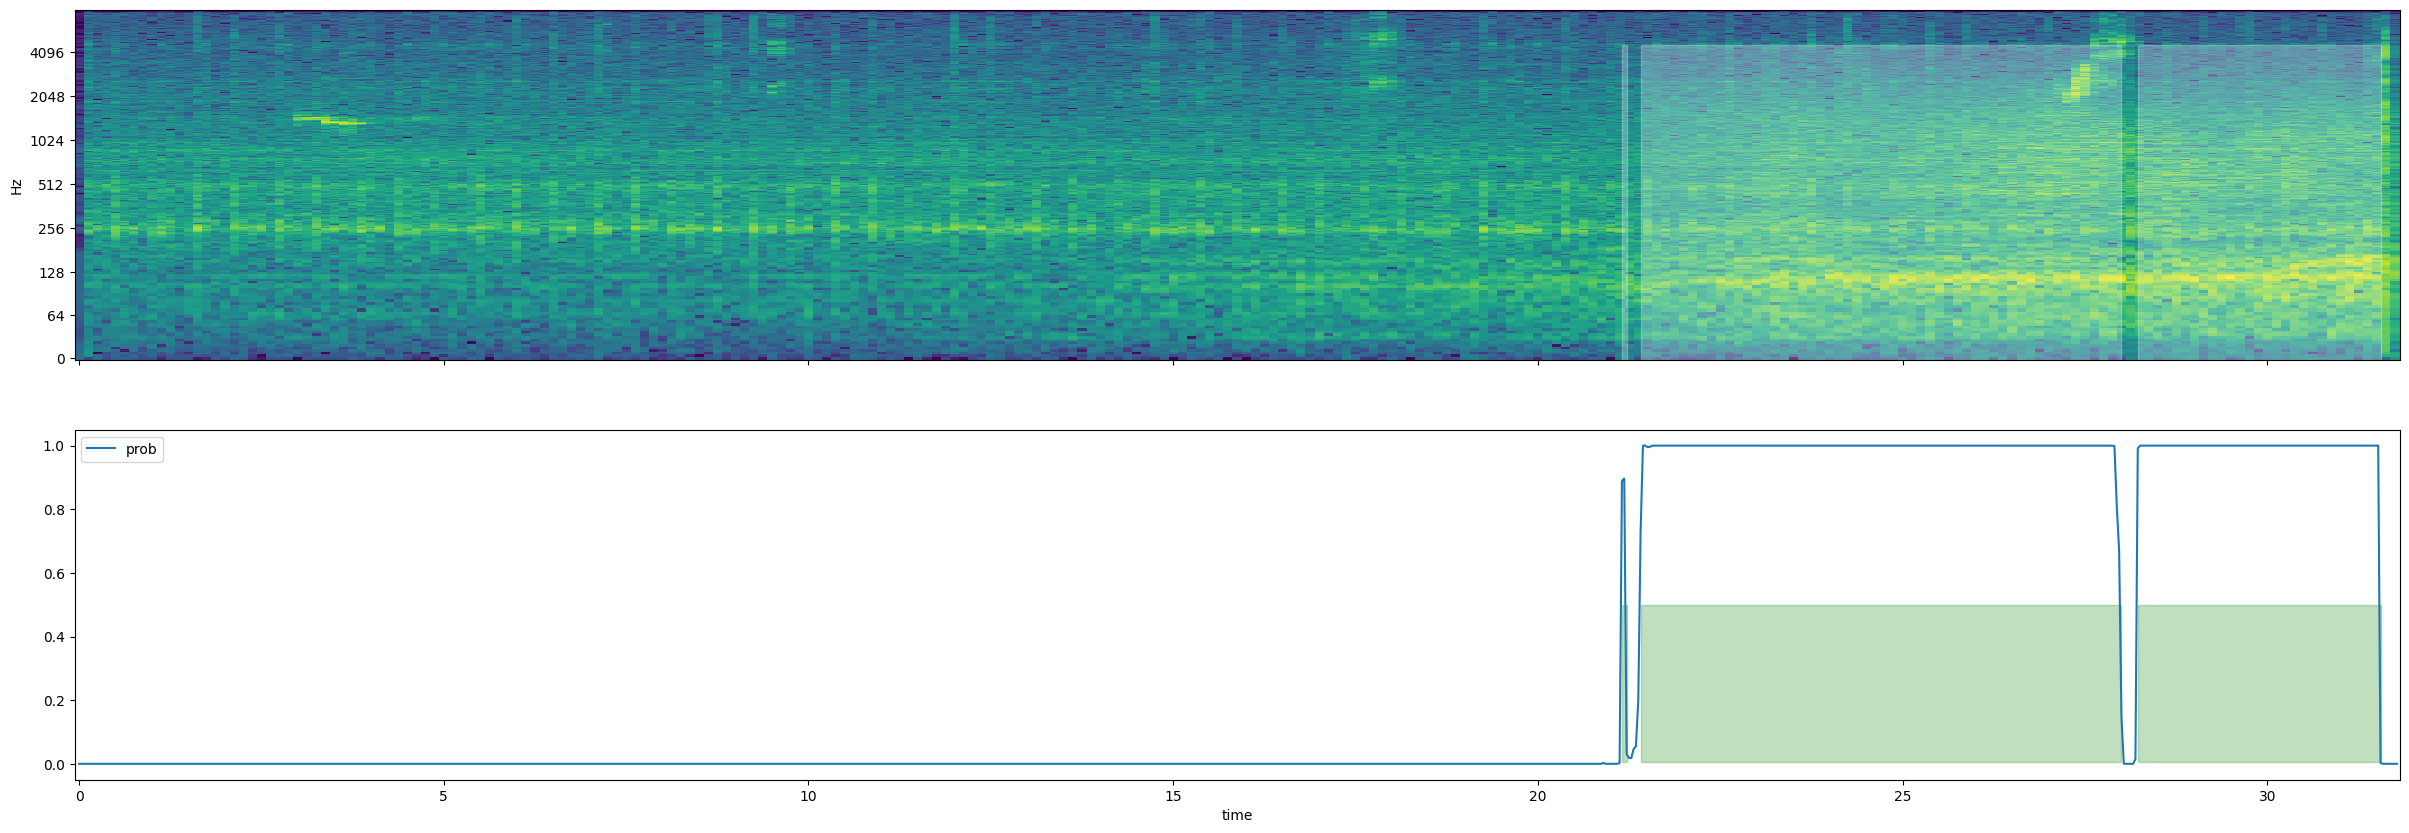

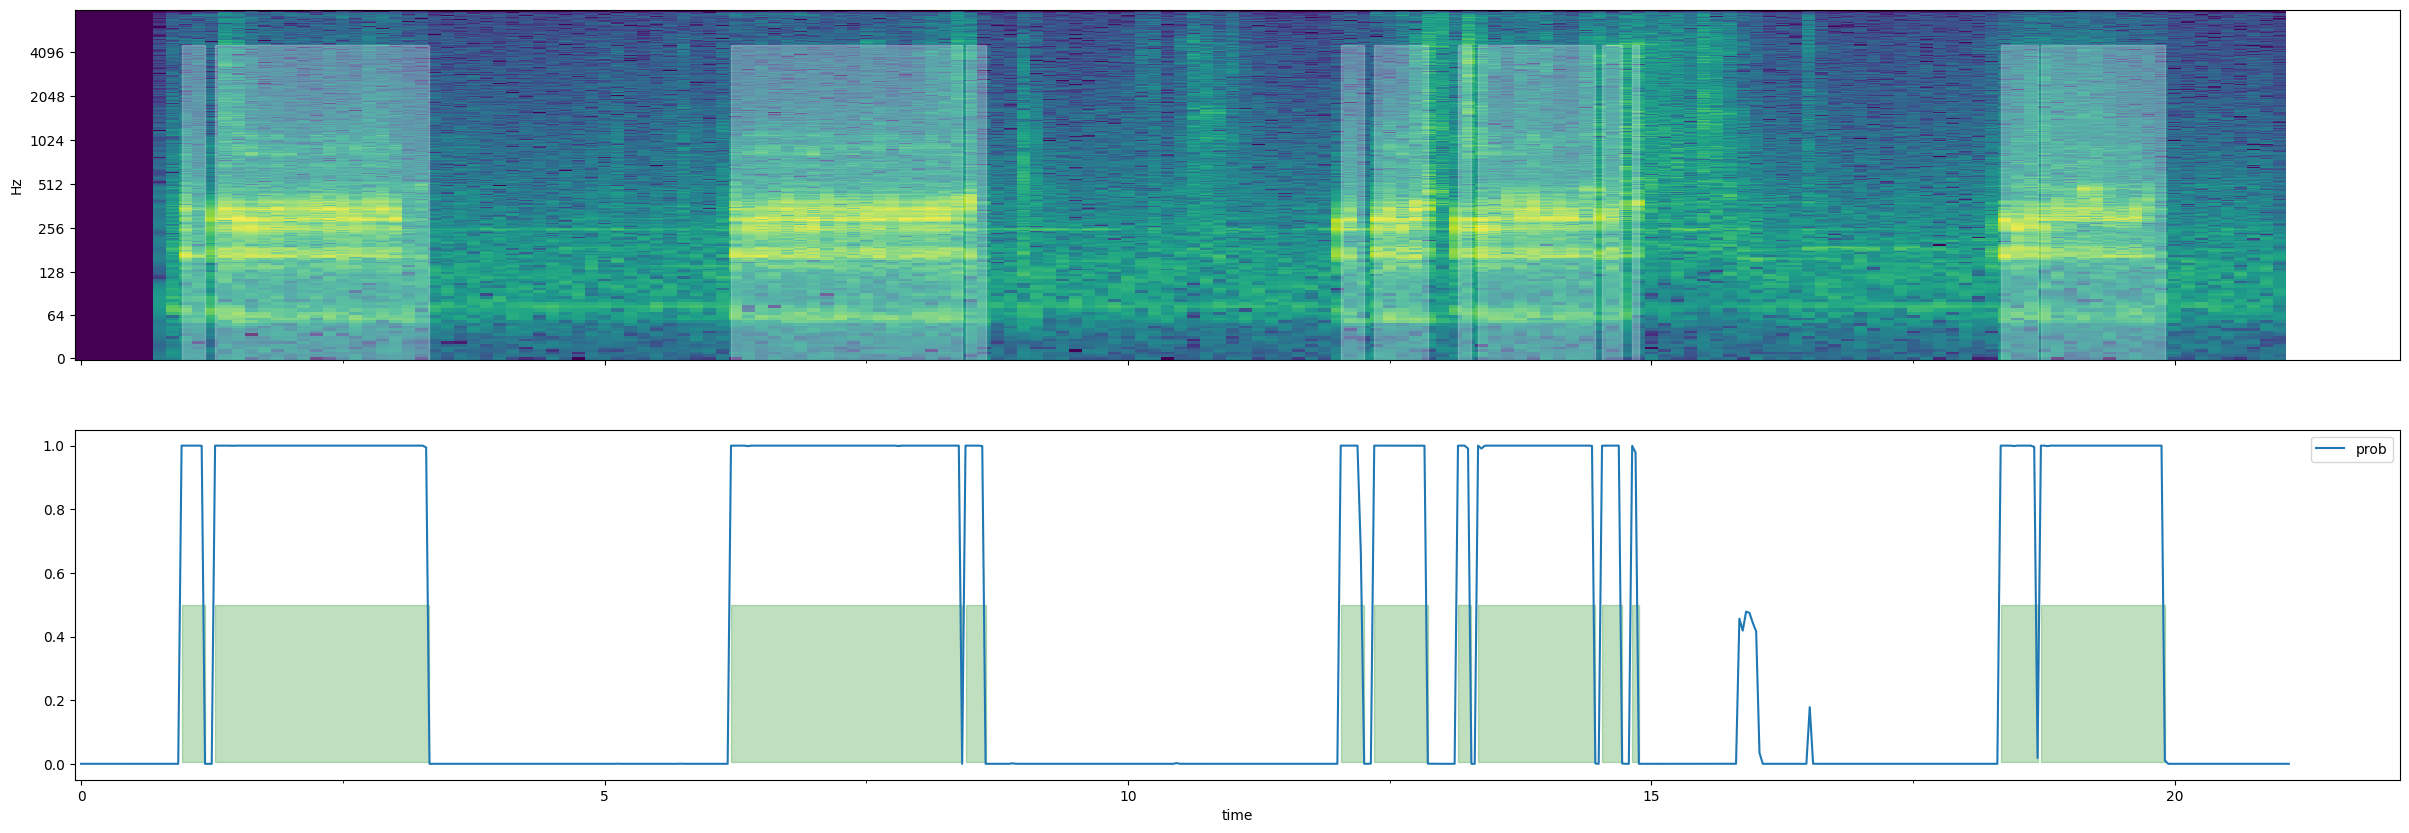

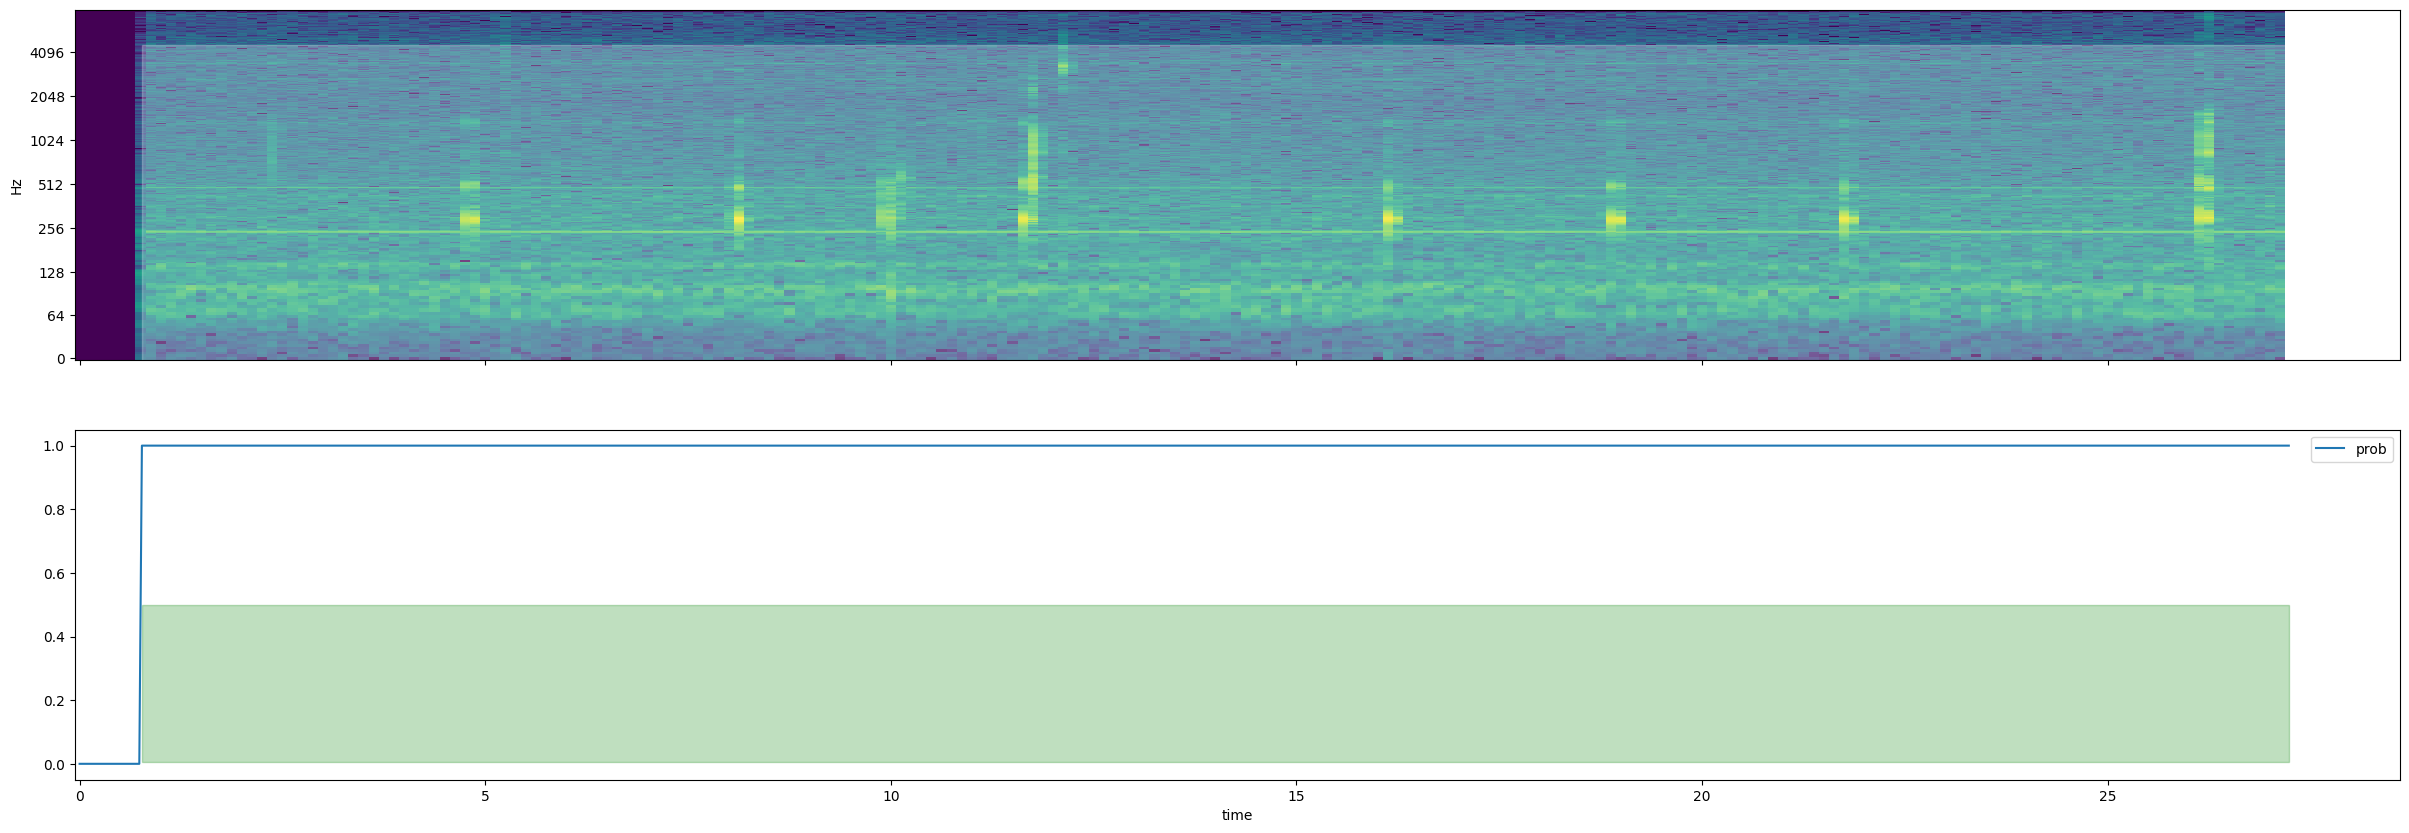

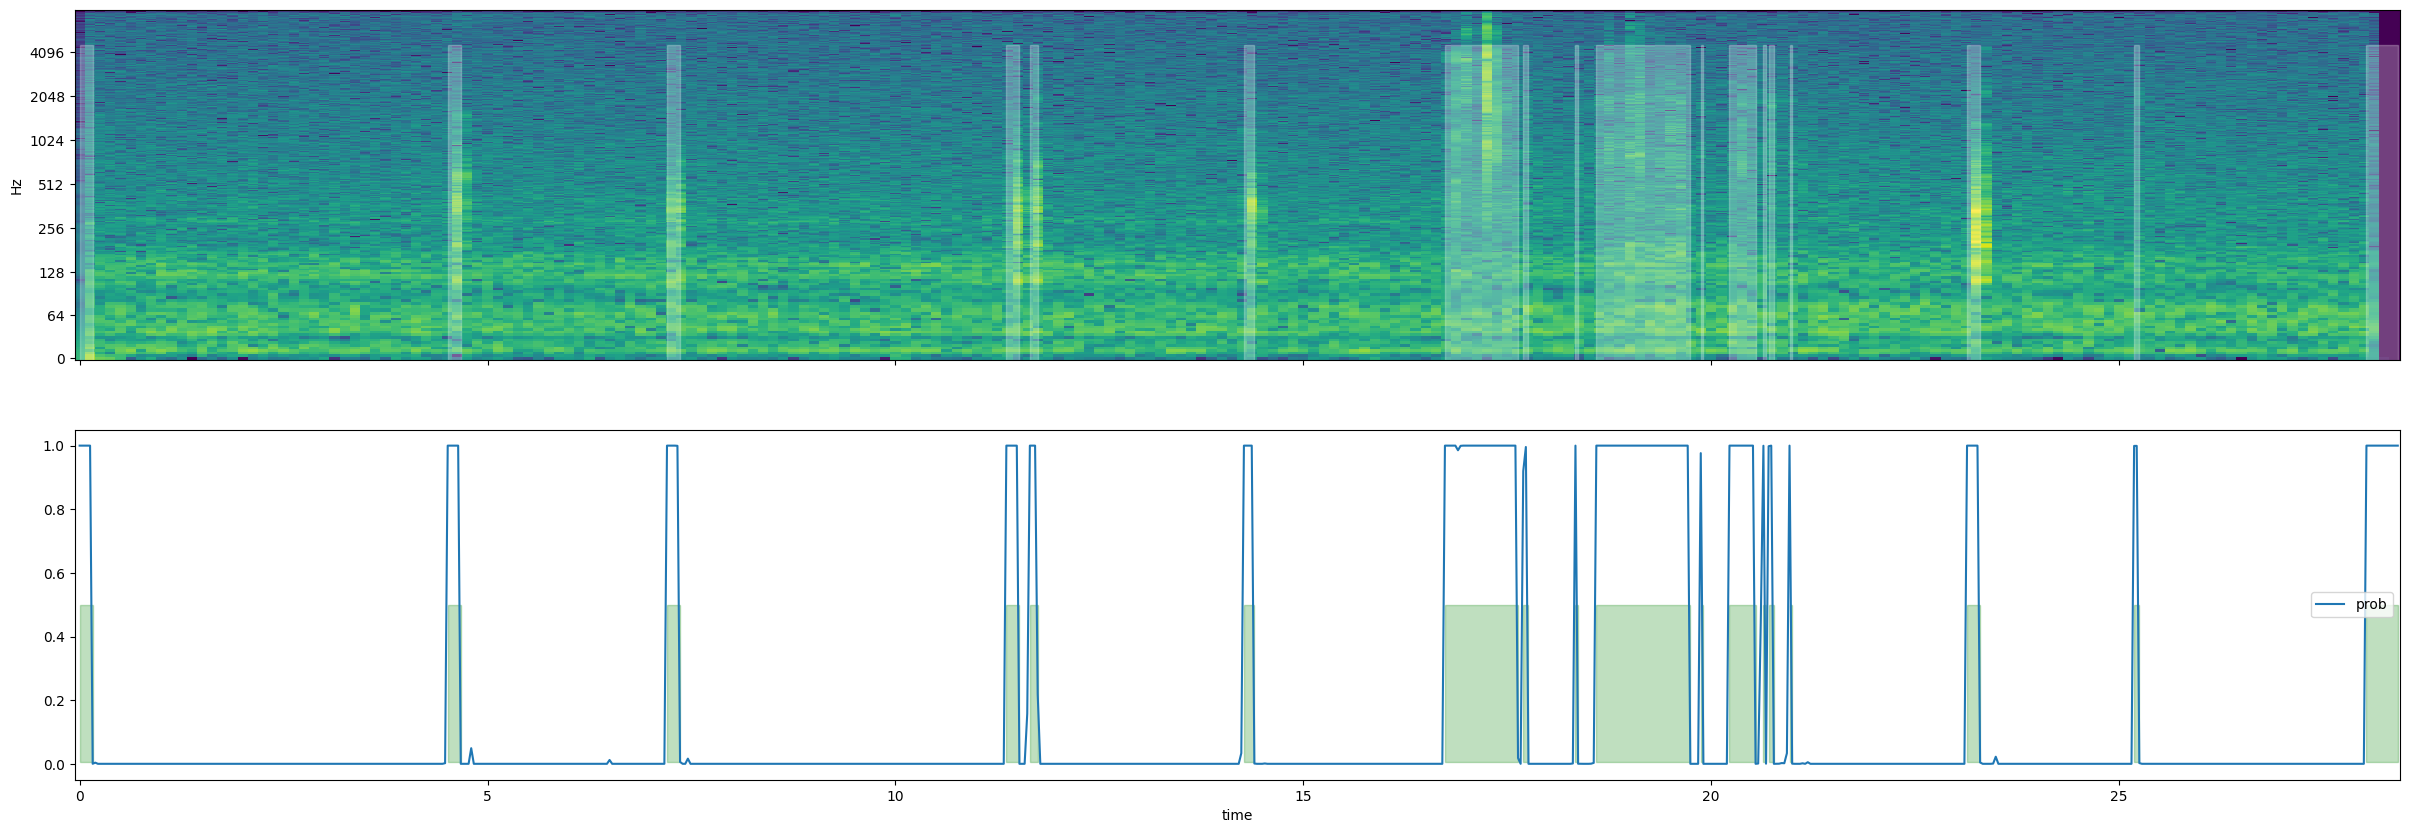

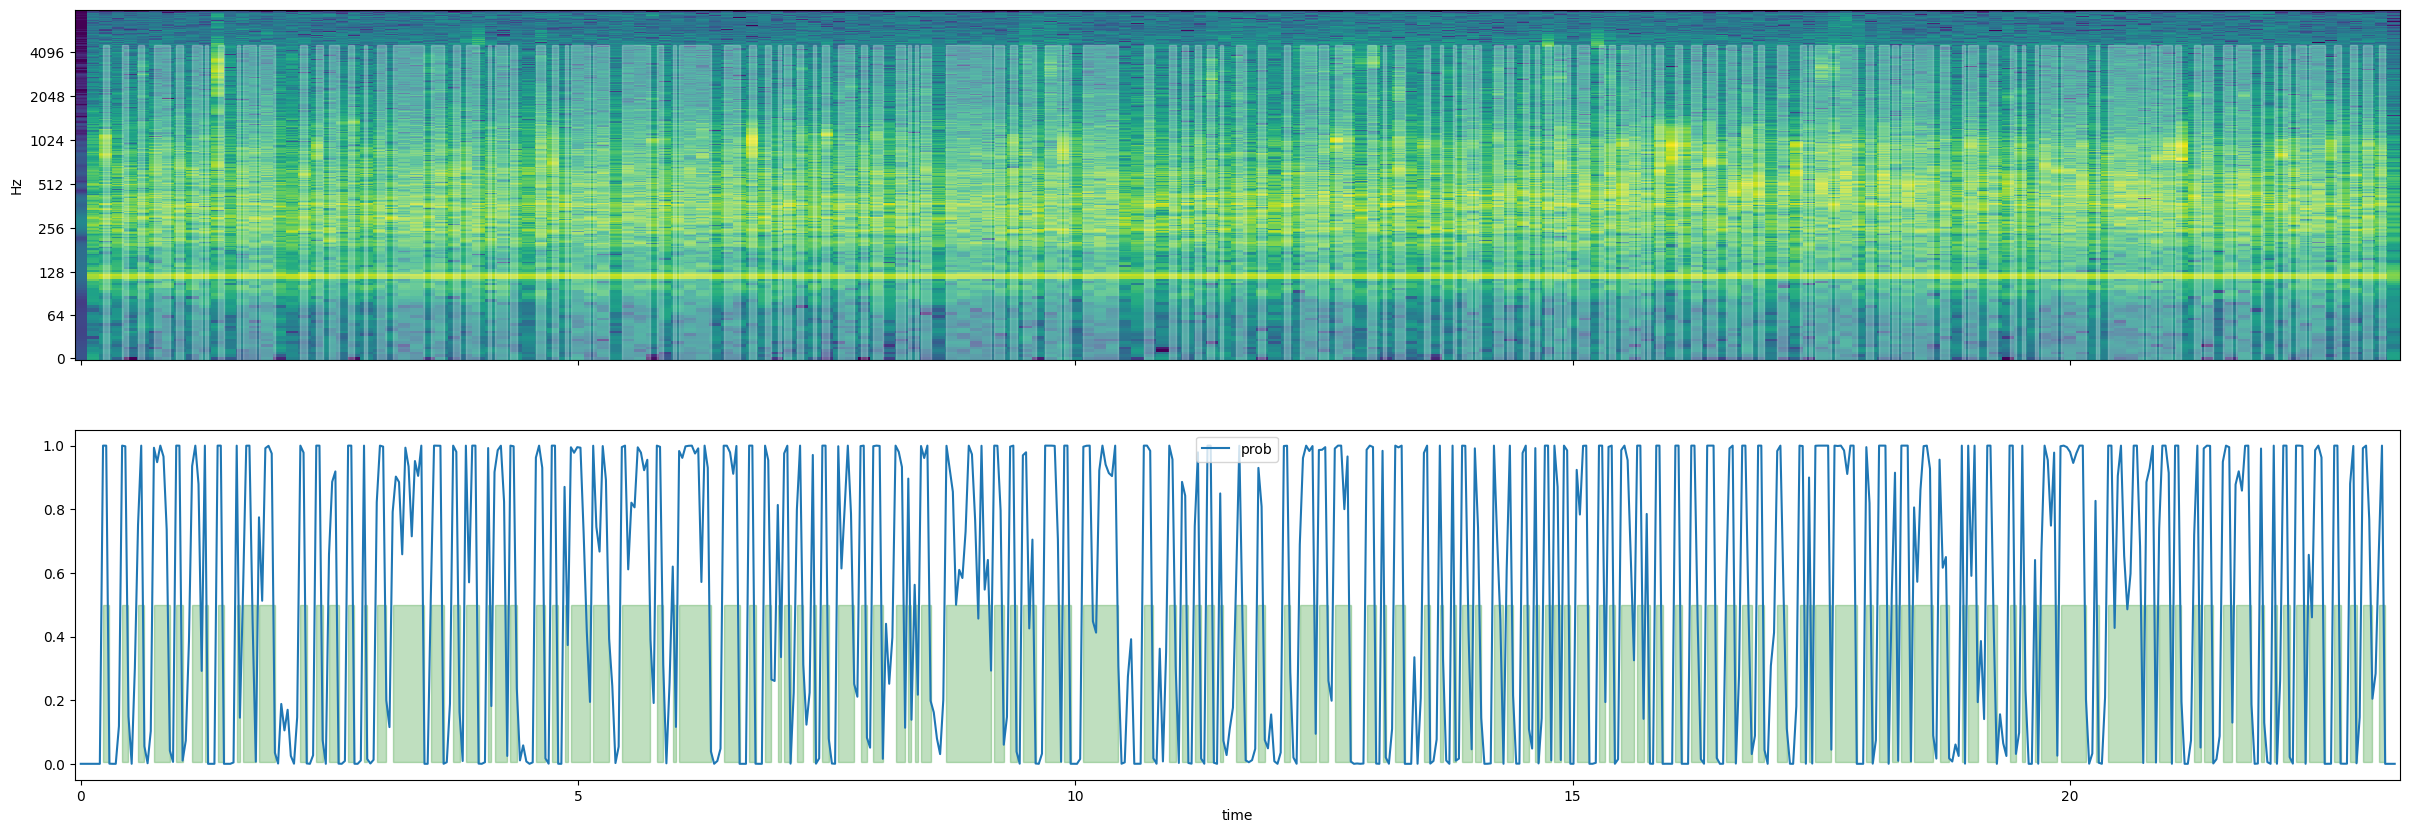

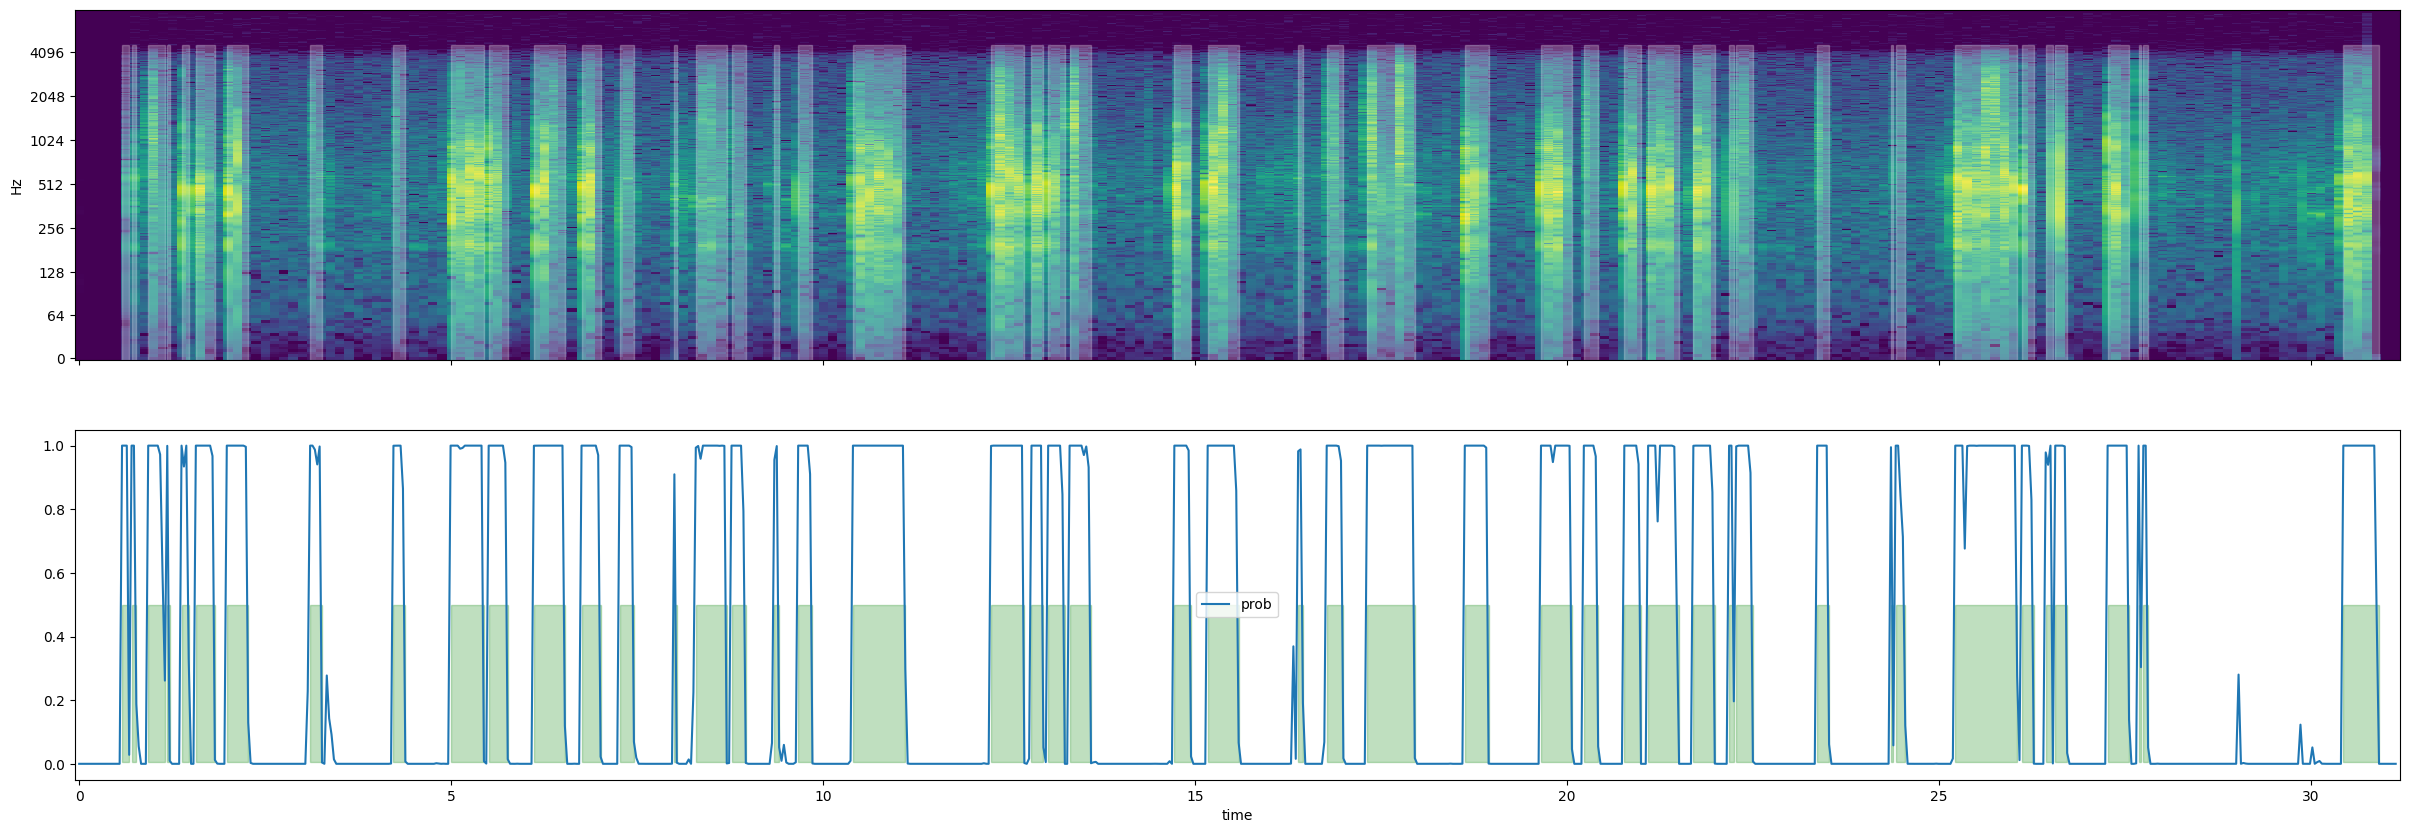

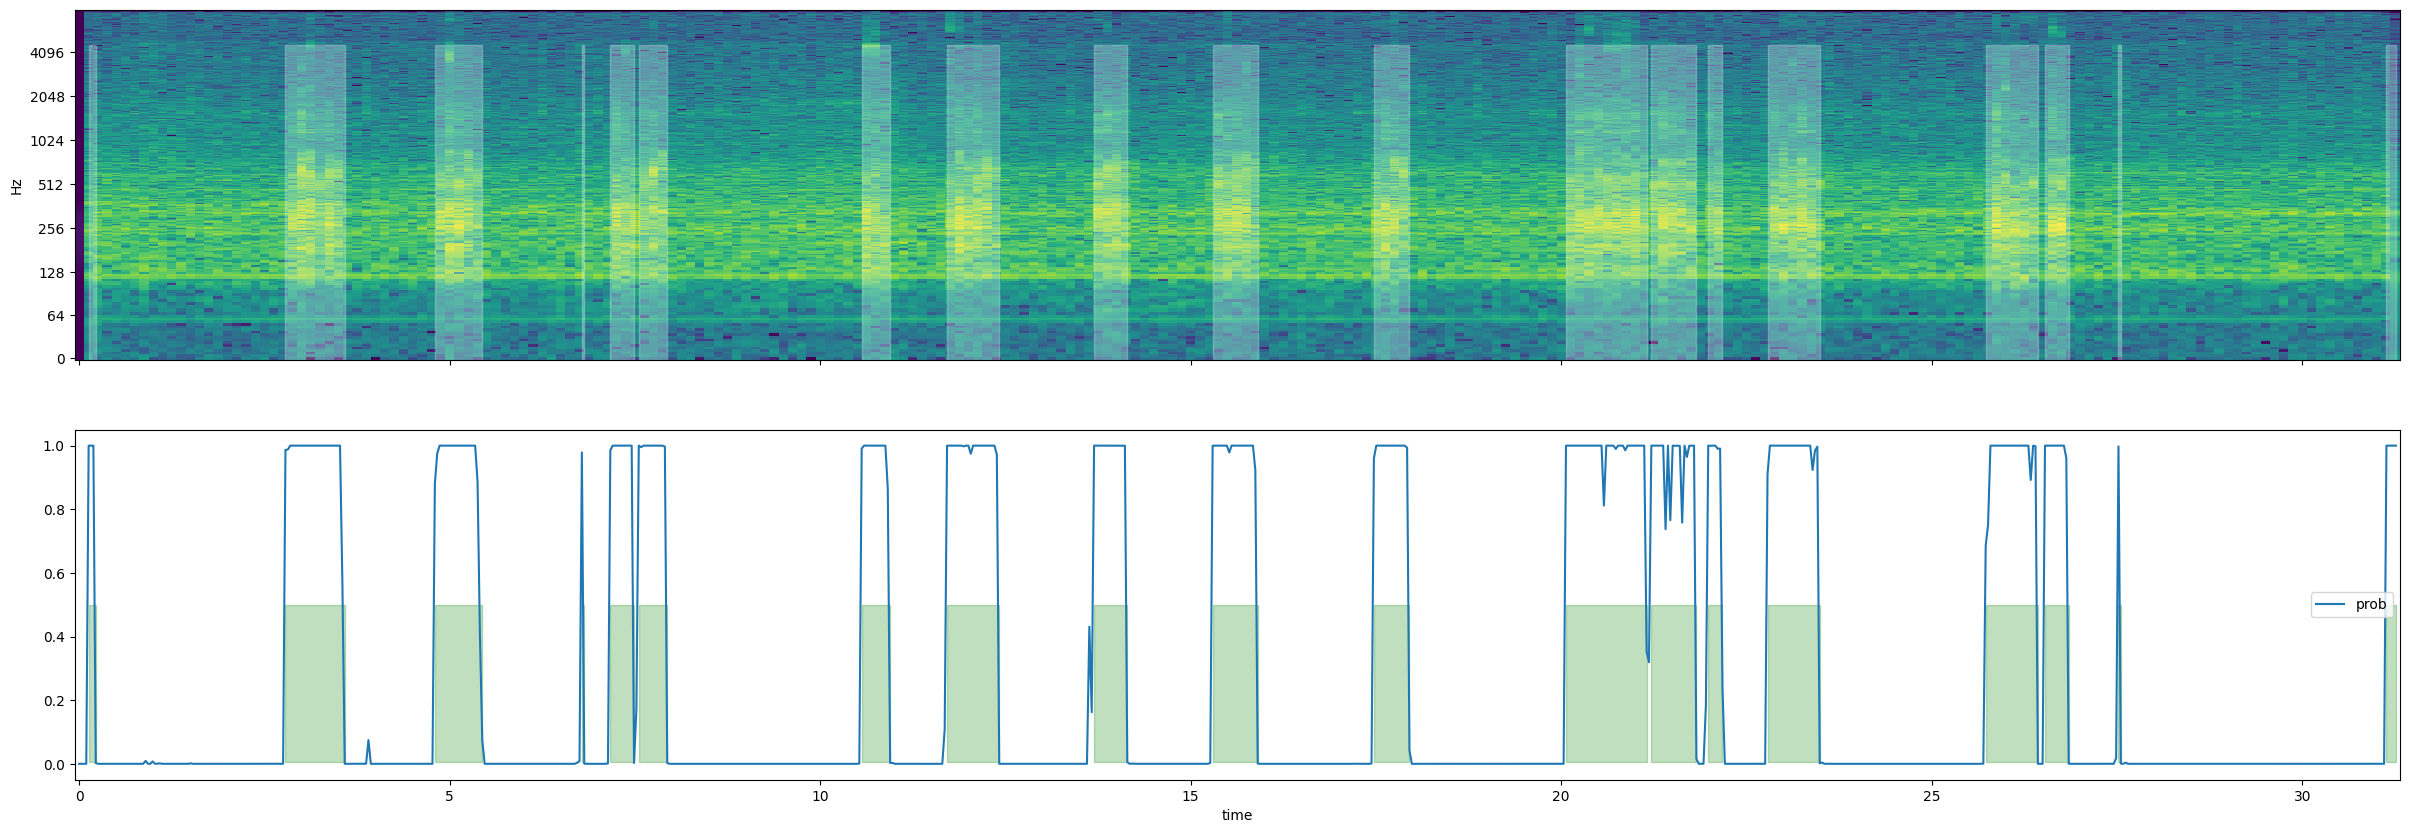

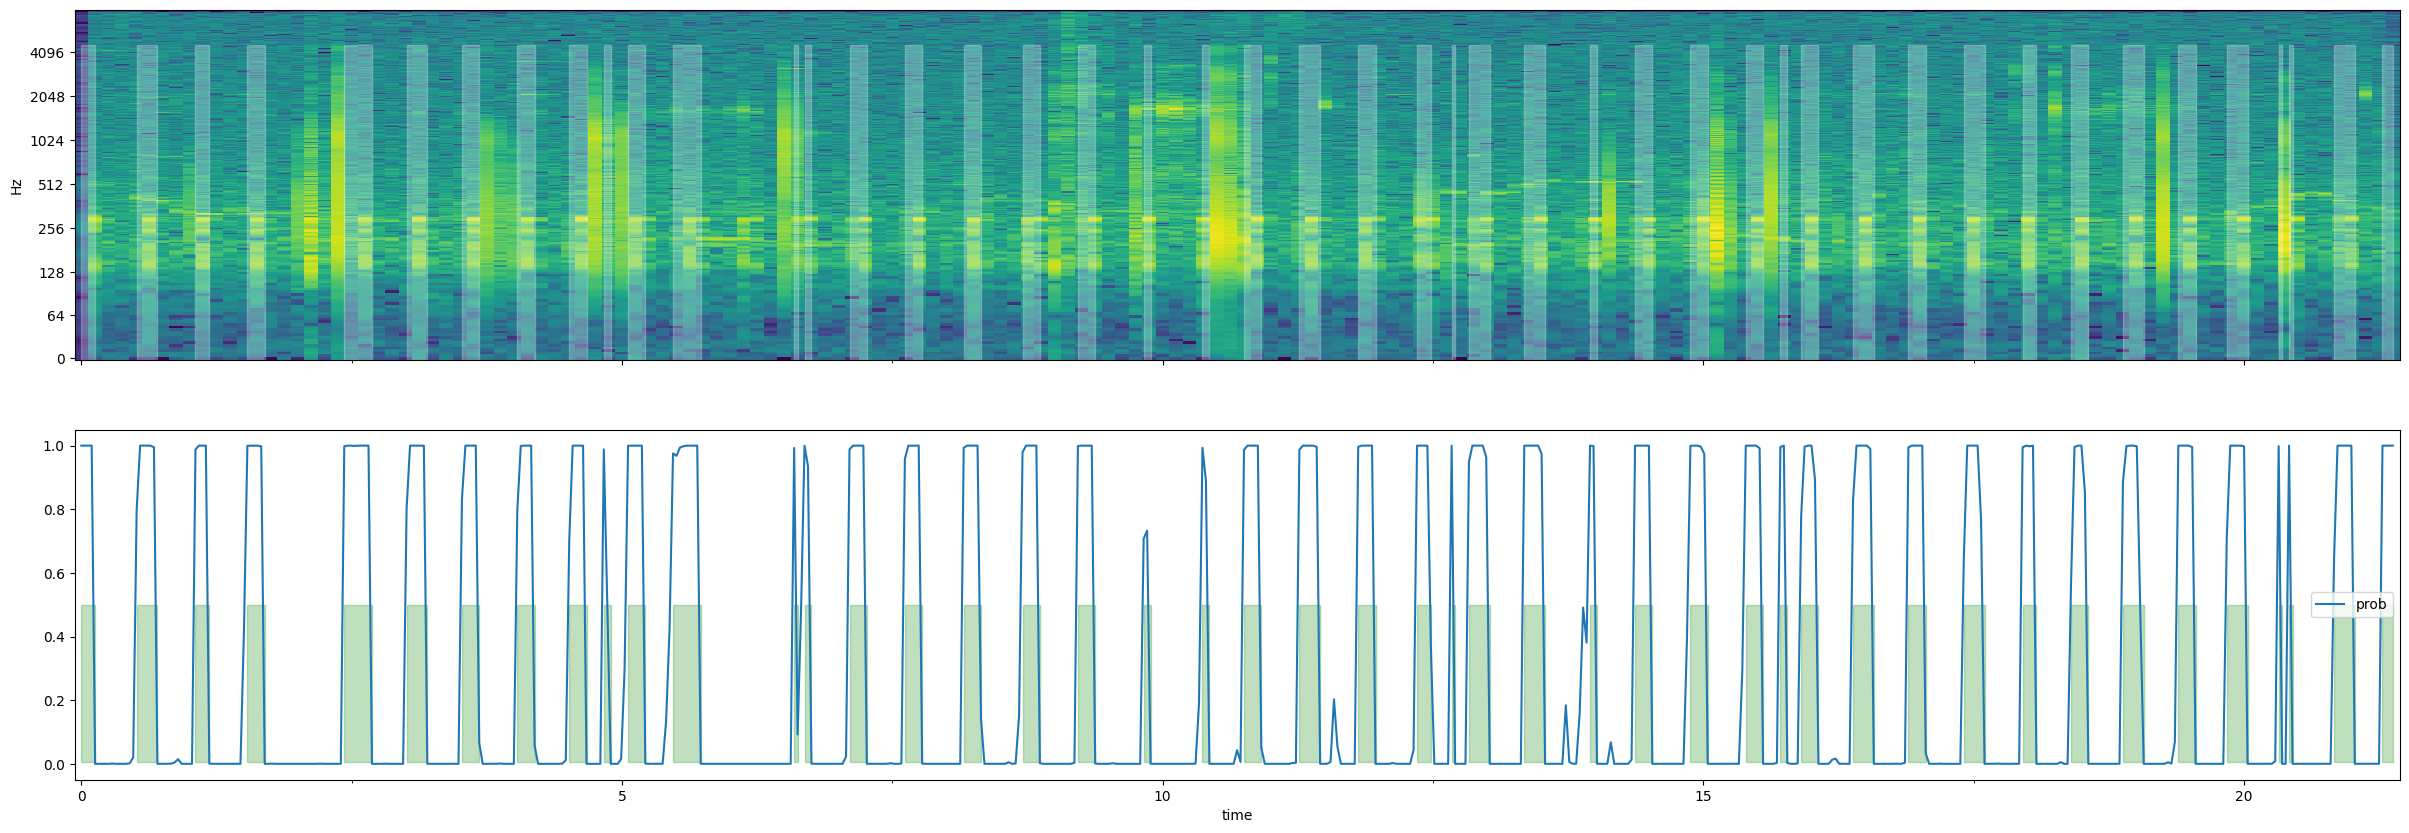

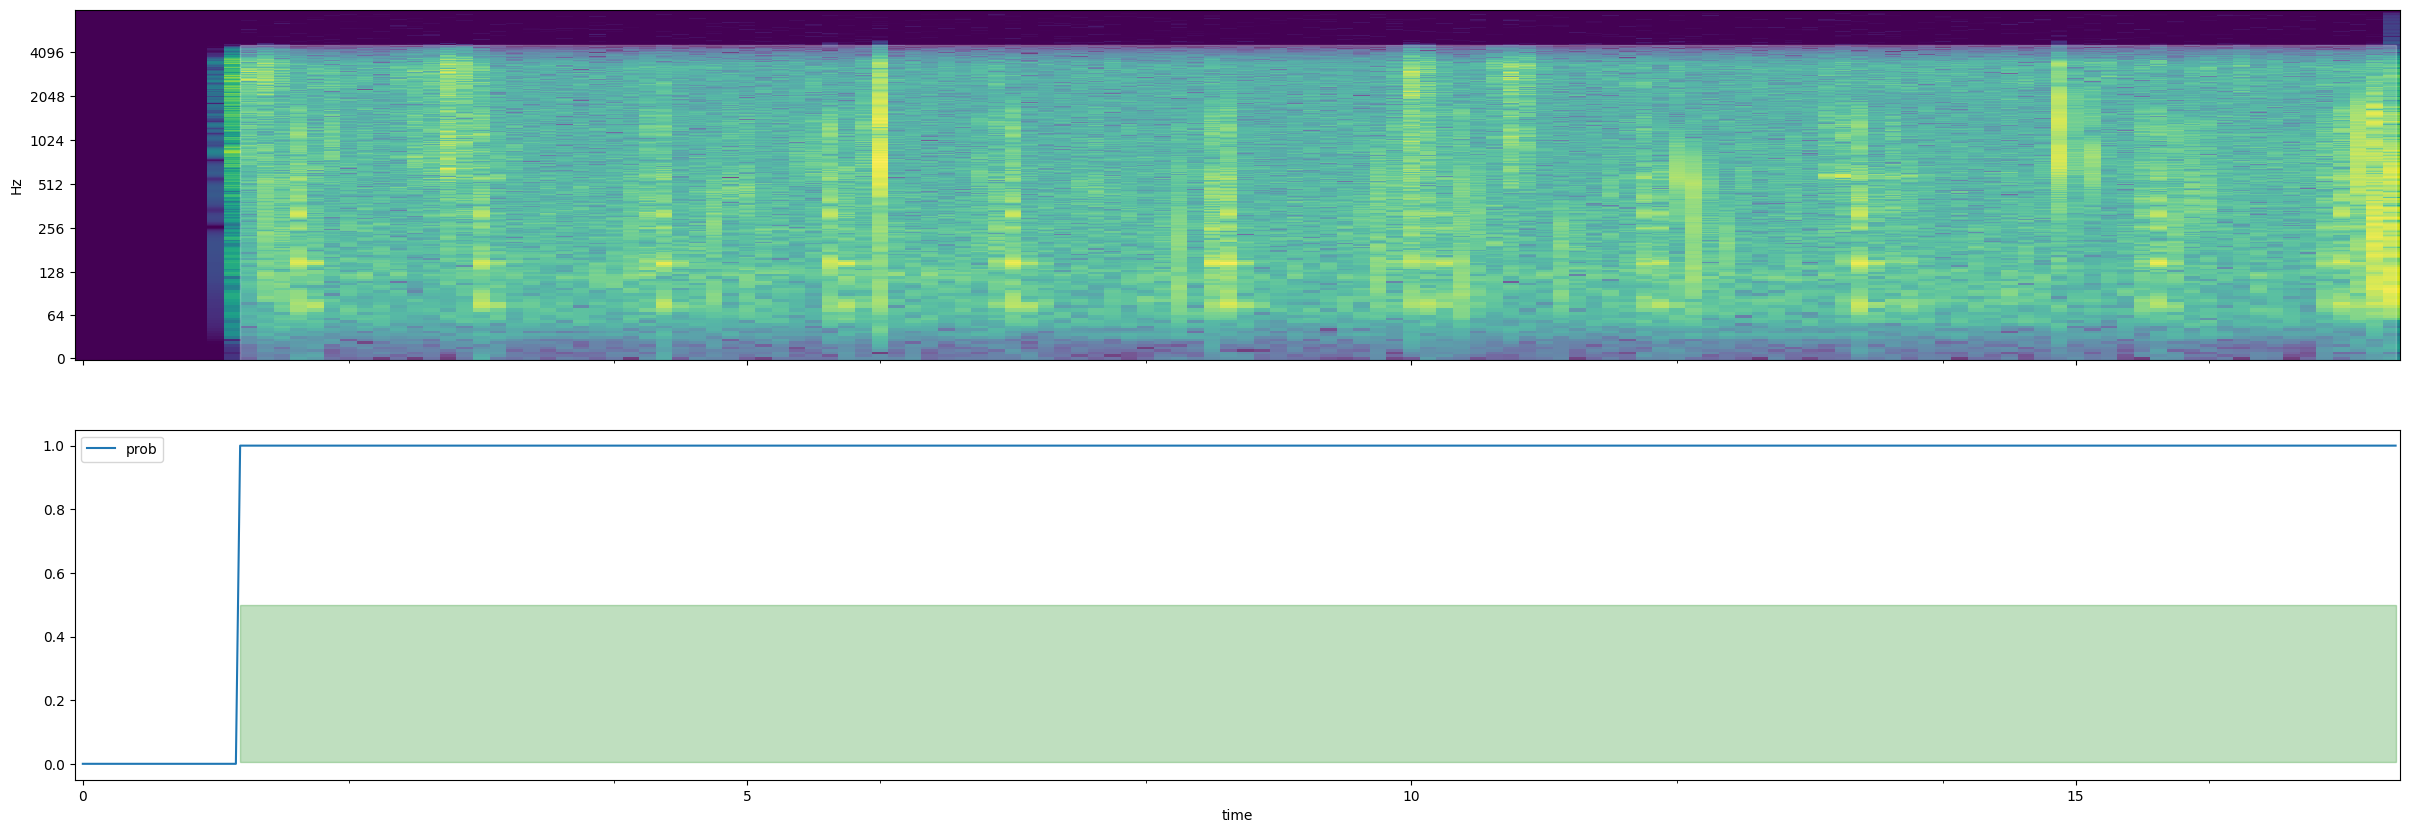

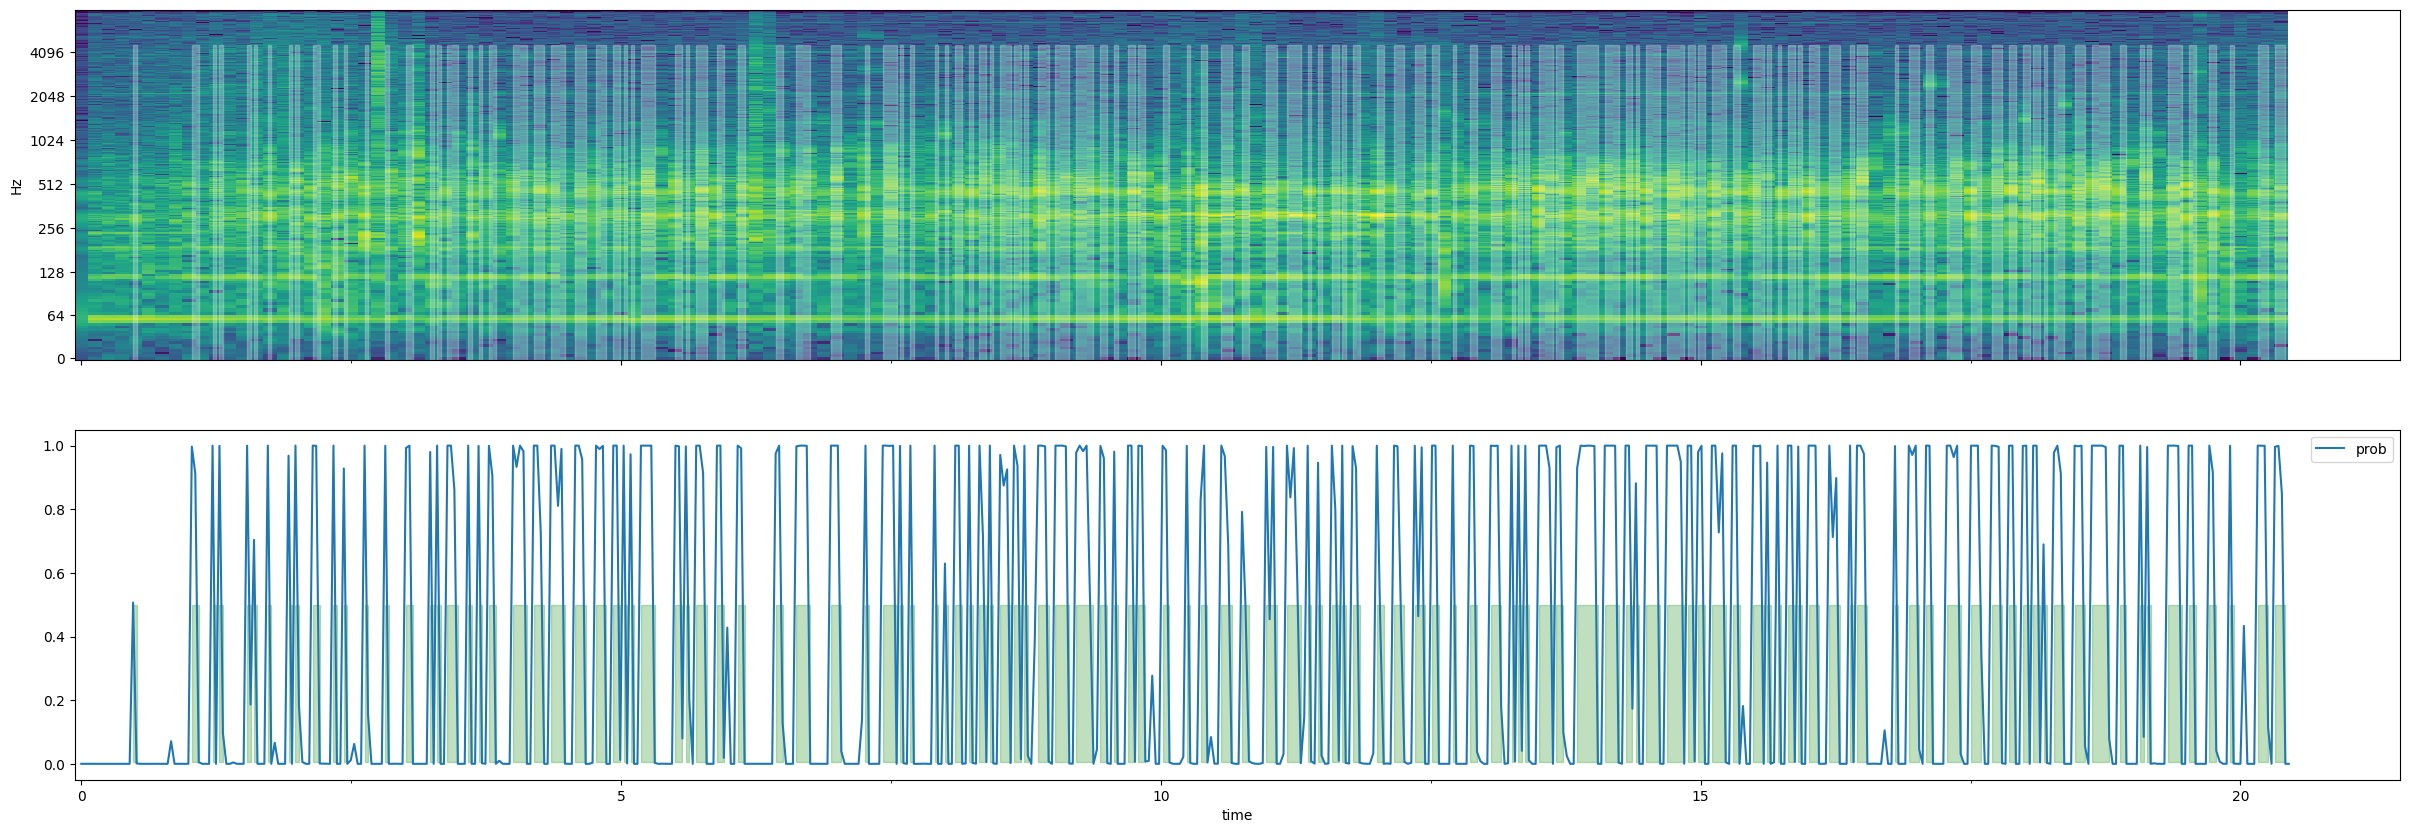

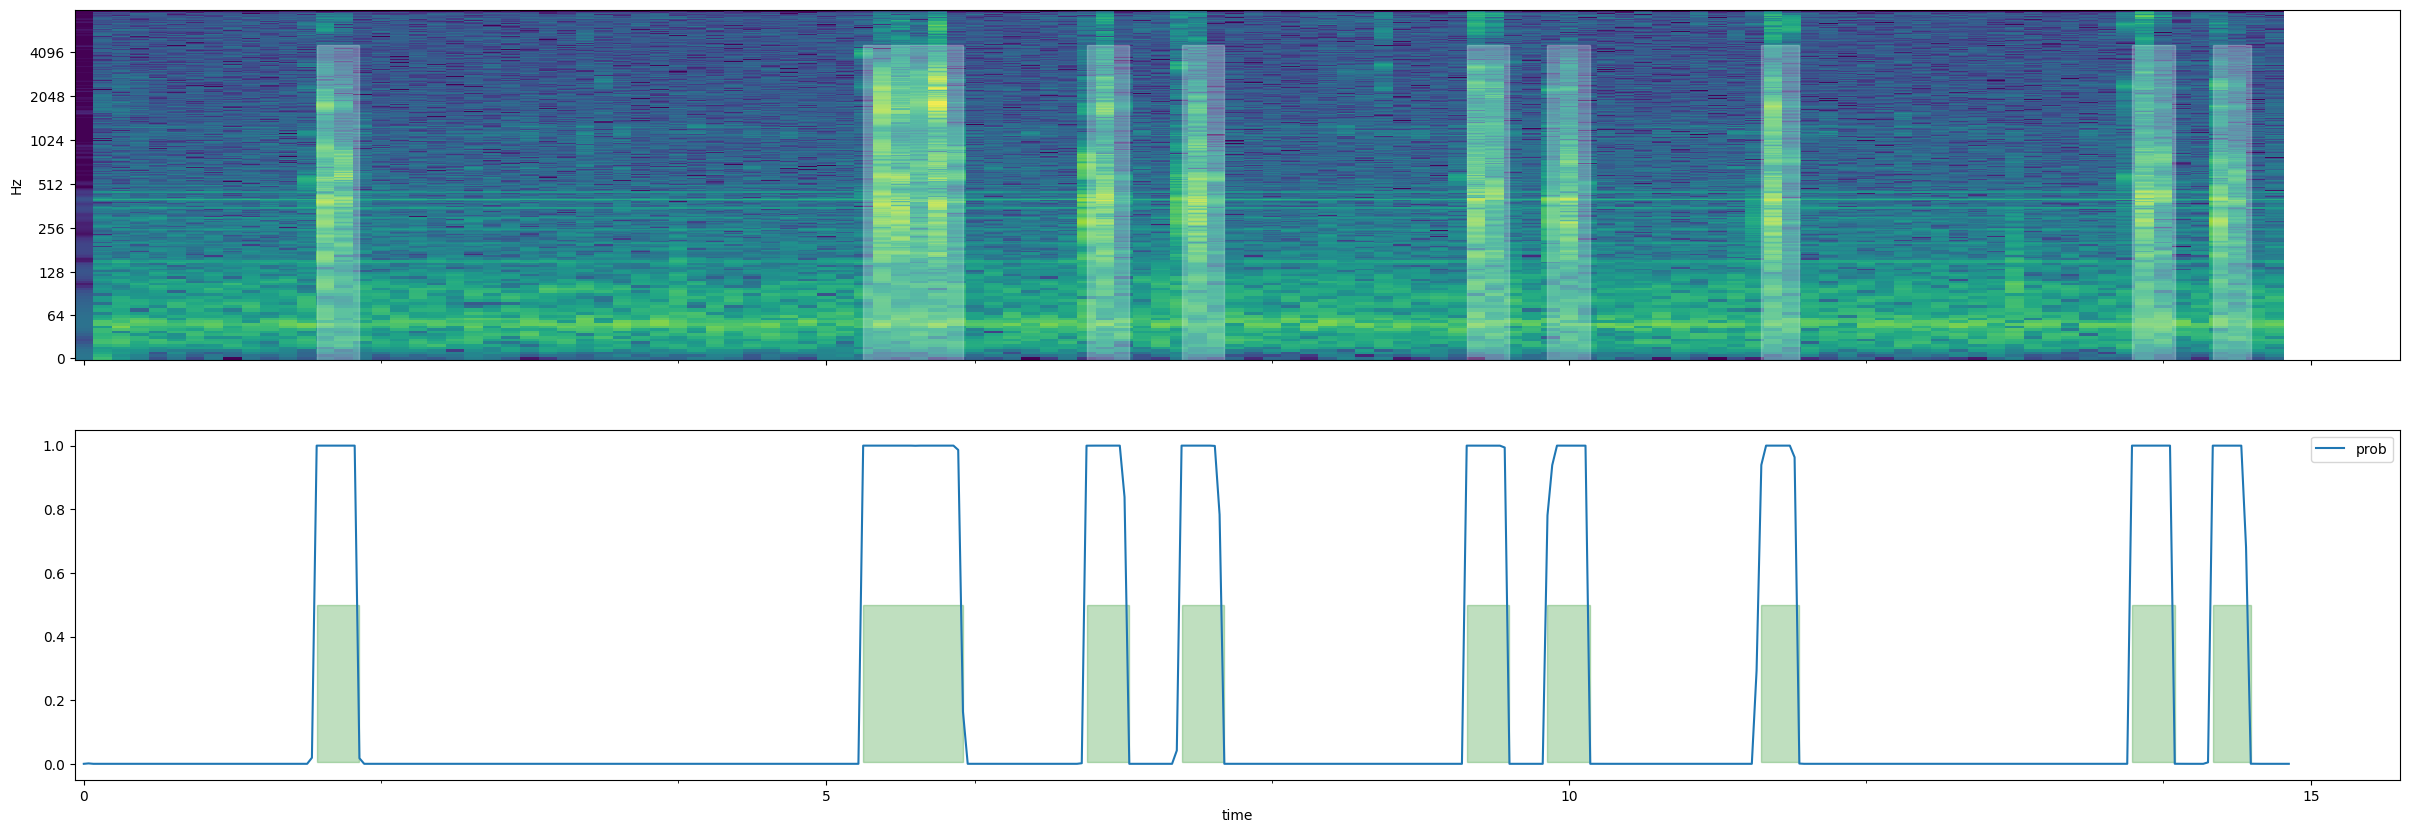

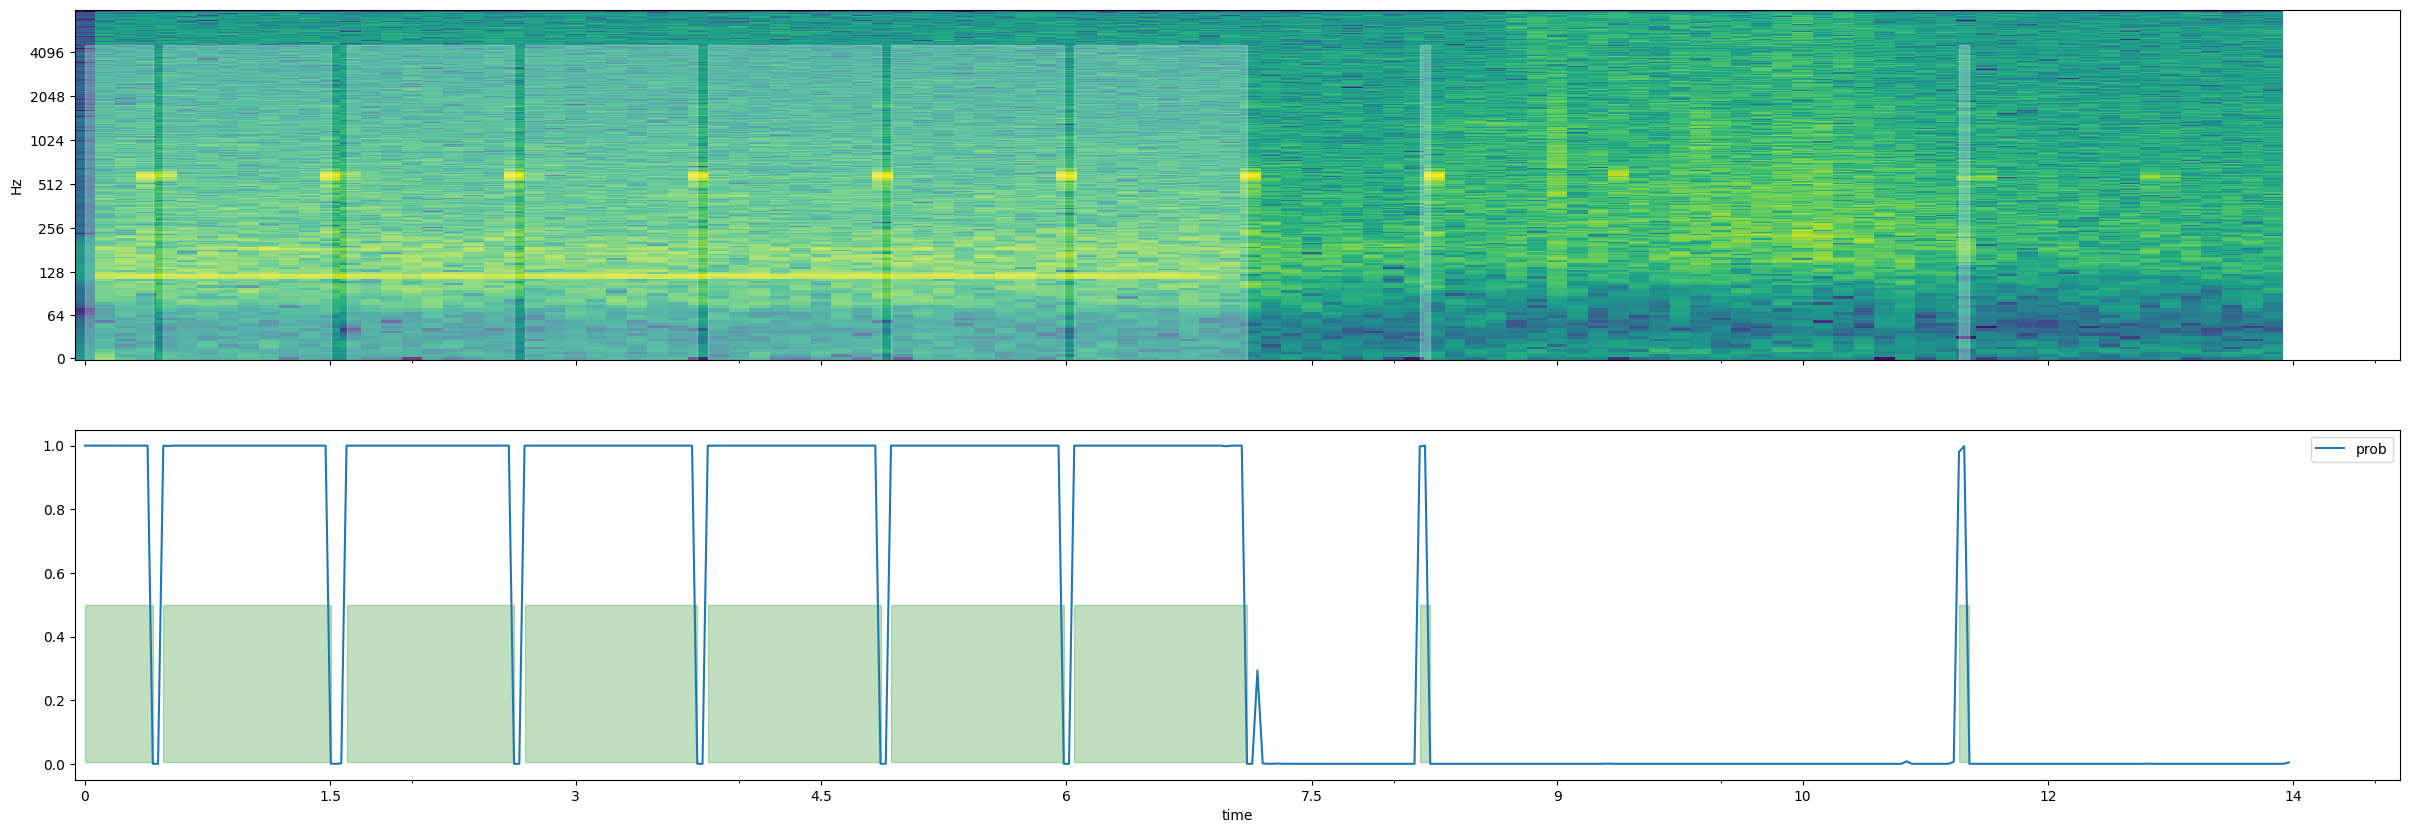

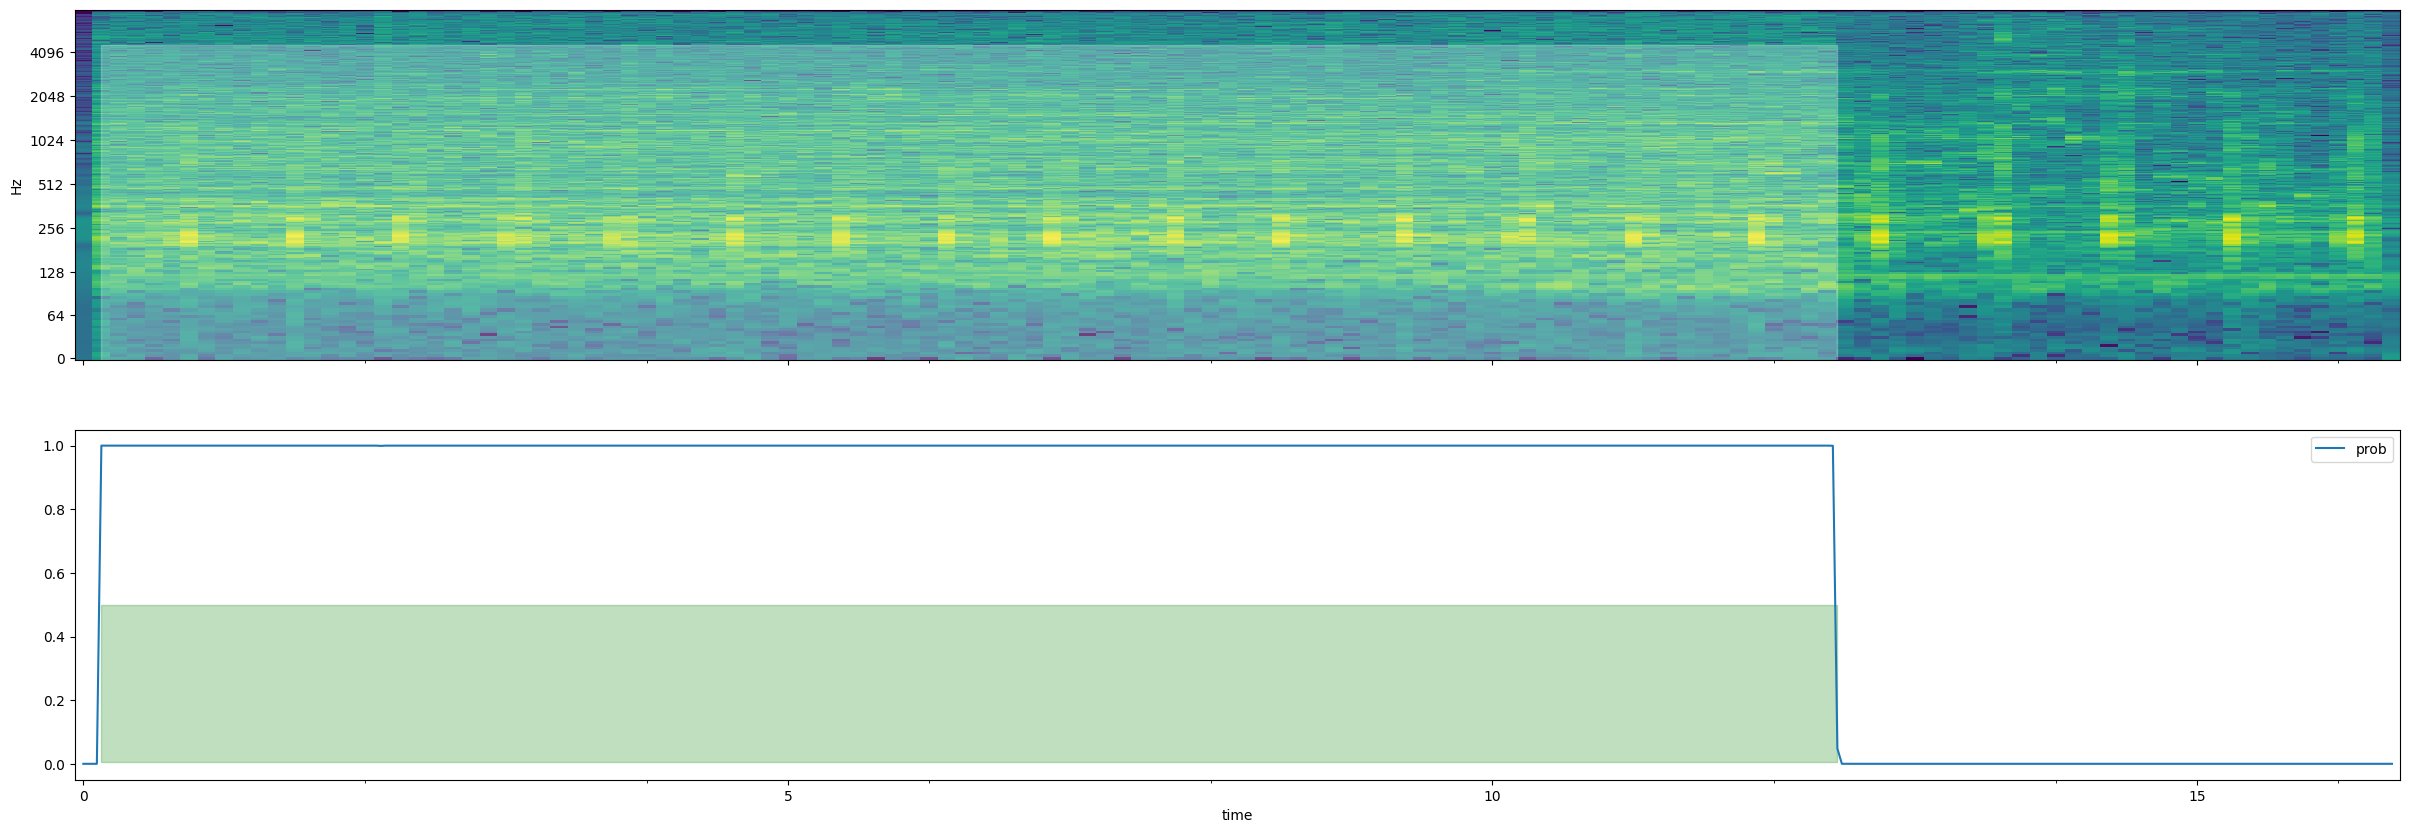

In [12]:

def join_events(series):
    # starts at the first 1
    # ends at the next 0
    pos = series[series == 1]
    ends = []
    starts = []
    for s_idx, s_val in pos.items():
        ff = series.loc[s_idx:].head(2)
        if len(ff) == 2:
            end = ff.index[1]
            #print(s_idx, end)
            ends.append(end)
            starts.append(s_idx)
    
    df = pandas.DataFrame({
        'start': starts,
        'end': ends,
    })
    return df

def label_audio(audio,
    window_length=0.256/8, sr=16000, plot=True, 
    on_threshold = 0.5,
    off_threshold = 0.4):
    
    plots = 2
    height = 5
    if plot:
        fig, axs = plt.subplots(plots, figsize=(30, height*plots), sharex=True)
    else:
        fig = None
    
    event_length = window_length
    
   
    # Spectrogram
    spec_hop = int(0.125 * sr)
    spec_fft = utils.next_power_of_2(spec_hop*2)
    stft = librosa.stft(audio, hop_length=spec_hop, n_fft=spec_fft)
    spec = librosa.amplitude_to_db(numpy.abs(stft), ref=numpy.max)
    
    # Compute features
    feature_hop = int(window_length*16000)
    feature_fft = utils.next_power_of_2(feature_hop*2)
    
    # MFCC
    ff = librosa.feature.mfcc(y=audio, sr=sr, hop_length=feature_hop, n_fft=feature_fft, n_mfcc=13) 
    delta = librosa.feature.delta(ff, width=7, order=1)
    ff = numpy.concatenate([ff, delta], axis=0)
    
    # Label the sequence
    hmm = find_events(ff.T)

    # Sort outputs such that highest volumes is always class 1    
    energy = librosa.feature.rms(y=audio, hop_length=feature_hop).T
    e1 = energy[hmm.prob > 0.5]
    e0 = energy[hmm.prob < 0.5]
    if numpy.median(e0) > numpy.median(e1):
        hmm['prob'] = 1.0 - hmm.prob

    # Times
    t = librosa.core.frames_to_time(numpy.arange(ff.shape[1]), hop_length=feature_hop, sr=sr)

    df = pandas.DataFrame({
        'prob': hmm.prob,
        'time': t,
    })
    series = df.set_index('time')['prob']
    
    sparse, dense = utils.mark_onoff(series, on_threshold=on_threshold, off_threshold=off_threshold)
    print(sparse)
    sparse
   
    #sparse.loc[0.0] = 0
    sparse = sparse.sort_index()
    lab = join_events(sparse)
    lab['annotation'] = 'p'
    lab

    if plot:
        ax = axs[0]
        librosa.display.specshow(spec, ax=ax, hop_length=spec_hop, sr=sr,
                                 y_axis='log', x_axis='time', cmap='viridis')
        
        ax = axs[1]
        df.plot(ax=ax, x='time')
        
        ax = axs[0]
        plot_time_spans(axs[0], lab, color='white', alpha=0.25, ymax=0.9, ymin=-0.1)
        plot_time_spans(axs[1], lab, color='green', alpha=0.25, ymax=0.5, ymin=0.05)
    

    return lab, sparse, fig

    
# TODO: label sections from couple different part of the file
# for example once per 15 or 30 minutes?
# can find length using soundfile.SoundFile(path)
    
def evaluate(audio, sr, sparse):    
    # Evaluation
    distances = sparse[sparse==1].reset_index()['index'].diff(1)

    duration = len(audio)/sr
    expected = math.floor(duration / distances.median())
    print('Event distances:', distances.mean(), distances.std()/distances.mean() )
    print('Events expected', expected)
    print('Events gotten', len(distances), (len(distances)/expected)*100, '%')

def label_section(audio, section_id, sr=16000):

    

    labels, sparse, fig = label_audio(audio, sr=sr)
    
    evaluate(audio=audio, sr=sr, sparse=sparse)
    
    fig.savefig(f"labels.{section_id}.png", bbox_inches='tight', pad_inches=0)

    labels_path = f'labels.{section_id}.txt'
    brewaed.labels.write(labels, labels_path)
    print('Wrote', labels_path)
    
    
for idx, row in files.tail(30).iterrows():
    # Load audio
    sr = 16000

    section_id = idx
    print(section_id)
    
    librosa.get_duration(path=row.path)
    
    audio, sr = librosa.load(row.path, offset=0.0, duration=1*60, sr=sr)
        
    label_section(audio, section_id, sr=sr)

